In [5]:
import pandas as pd
from prog.data_ivt import busca_cliente_new, hour_col_to_date_col_new
from prog.data_cmg import CMg
from pathlib import Path
import glob

# Definir path de IVT y CMg.
Además, carga último IVT para ver nombre de clientes en "df"

In [6]:
path_ivt = Path(r'C:\_BD_Clientes\IVT')

archivos_ivt = glob.glob(str(path_ivt) + '\\IVT*.parquet')
archivos_cmg = glob.glob(str(path_ivt) + '\\CMg*.parquet')
print(archivos_ivt)
print('*'*80)
print(archivos_cmg)

['C:\\_BD_Clientes\\IVT\\IVT_22_01.parquet', 'C:\\_BD_Clientes\\IVT\\IVT_22_02.parquet', 'C:\\_BD_Clientes\\IVT\\IVT_22_03.parquet', 'C:\\_BD_Clientes\\IVT\\IVT_22_04.parquet', 'C:\\_BD_Clientes\\IVT\\IVT_22_05.parquet', 'C:\\_BD_Clientes\\IVT\\IVT_22_06.parquet', 'C:\\_BD_Clientes\\IVT\\IVT_22_07.parquet', 'C:\\_BD_Clientes\\IVT\\IVT_22_08.parquet', 'C:\\_BD_Clientes\\IVT\\IVT_22_09.parquet', 'C:\\_BD_Clientes\\IVT\\IVT_22_10.parquet', 'C:\\_BD_Clientes\\IVT\\IVT_22_11.parquet', 'C:\\_BD_Clientes\\IVT\\IVT_22_12.parquet', 'C:\\_BD_Clientes\\IVT\\IVT_23_01.parquet', 'C:\\_BD_Clientes\\IVT\\IVT_23_02.parquet', 'C:\\_BD_Clientes\\IVT\\IVT_23_03.parquet', 'C:\\_BD_Clientes\\IVT\\IVT_23_04.parquet', 'C:\\_BD_Clientes\\IVT\\IVT_23_05.parquet', 'C:\\_BD_Clientes\\IVT\\IVT_23_06.parquet', 'C:\\_BD_Clientes\\IVT\\IVT_23_07.parquet', 'C:\\_BD_Clientes\\IVT\\IVT_23_08.parquet', 'C:\\_BD_Clientes\\IVT\\IVT_23_09.parquet', 'C:\\_BD_Clientes\\IVT\\IVT_23_10.parquet', 'C:\\_BD_Clientes\\IVT\\IVT_23_

# Definir nombre de clientes a buscar, y luego buscarlos

In [10]:
#cliente_1 = 'WATT'
#cliente_2 = 'PACKING Y SERVICIOS RUCARAY'
#cliente_1 = 'OLIBAL'
#cliente_2 = 'ABASOLO'
#cliente_1 = 'AGROSUPER'
#cliente_1 = 'MINERA_POTRERILLOS_ _LA_CRUZ'
#cliente_2 = 'asd'
cliente_1 = 'VEGA MONUMENTAL'
cliente_2 = 'asd'

df = pd.read_parquet(archivos_cmg[-1])

año = archivos_cmg[-1].split('CMg_')[1][:2]
mes = archivos_cmg[-1].split('.parquet')[0][-2:]

df = hour_col_to_date_col_new(df, año, mes)
df_1 = busca_cliente_new(df, cliente_1)
df_2 = busca_cliente_new(df, cliente_2)

for col in df_1.columns:
    print(col)
print('\n','--'*60,'\n')
print(df_2.columns.to_list())

EJERCITO______013;CGE_C;L_D;PM5701;INMOB VEGA MONUMENTAL S.A.
EJERCITO______013;CGE_C;L_D;PM5702;COMERCIALIZADORA VEGA MONUMENTAL

 ------------------------------------------------------------------------------------------------------------------------ 

[]


# Filtra Perfiles y CMg, por cliente

In [9]:
df_ivt = pd.DataFrame()

for i in archivos_ivt:
    año = i.split('IVT_')[1][:2]
    mes = i.split('.parquet')[0][-2:]
    
    df_i = pd.read_parquet(path_ivt / i)
    df_i = hour_col_to_date_col_new(df_i, año, mes)
    print(f'procesando IVT...año: {año}, mes: {mes}', end='\r')
    
    for c in [cliente_1, cliente_2]:
        df = busca_cliente_new(df_i, c)
        df_ivt = pd.concat([df_ivt, df])
        
df_ivt.to_excel(path_ivt / f'IVT_{cliente_1}_{cliente_2}.xlsx', index=True)
print('Proceso IVT Terminado')


df_cmg = pd.DataFrame()
for i in archivos_cmg:
    año = i.split('CMg_')[1][:2]
    mes = i.split('.parquet')[0][-2:]
    
    df_i = pd.read_parquet(path_ivt / i)
    df_i = hour_col_to_date_col_new(df_i, año, mes)
    print(f'procesando CMg...año: {año}, mes: {mes}', end='\r')
    
    for c in [cliente_1, cliente_2]:
        df = busca_cliente_new(df_i, c)
        df_cmg = pd.concat([df_cmg, df])
        
df_cmg.to_excel(path_ivt / f'CMg_{cliente_1}_{cliente_2}.xlsx', index=True)
print('Proceso CMg Terminado')
    

Proceso IVT Terminado 23, mes: 11
Proceso CMg Terminado 23, mes: 11


In [7]:
df_cmg.tail()

nombre,D.ALMAGRO_____023;ENGIE;L_D;PM3161;MINERA_POTRERILLOS_ _LA_CRUZ DIEGO_DE_ALMAGRO_023
2023-11-30 19:00:00,NaN
2023-11-30 20:00:00,NaN
2023-11-30 21:00:00,NaN
2023-11-30 22:00:00,NaN
2023-11-30 23:00:00,NaN


In [23]:
df_ivt.tail()

nombre,D.ALMAGRO_____023;ENGIE;L_D;PM3161;MINERA_POTRERILLOS_ _LA_CRUZ DIEGO_DE_ALMAGRO_023
2023-08-31 19:00:00,NaN
2023-08-31 20:00:00,NaN
2023-08-31 21:00:00,NaN
2023-08-31 22:00:00,NaN
2023-08-31 23:00:00,NaN


In [16]:
cl = df_ivt.groupby([df_ivt.index.year, df_ivt.index.month]).mean()
print(cl.columns)

Index(['D.ALMAGRO_____023;ENGIE;L_D;PM3161;MINERA_POTRERILLOS_ _LA_CRUZ DIEGO_DE_ALMAGRO_023'], dtype='object', name='nombre')


In [19]:
cl[cliente_1] = cl['D.ALMAGRO_____023;ENGIE;L_D;PM3161;MINERA_POTRERILLOS_ _LA_CRUZ DIEGO_DE_ALMAGRO_023'] * -1

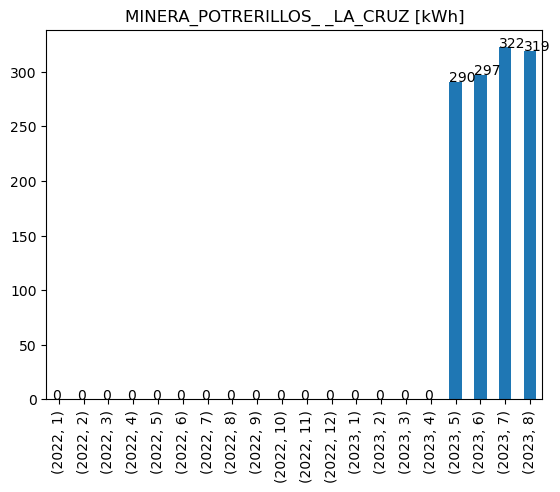

In [27]:
ax = cl[cliente_1].plot.bar(title=cliente_1 + " [kWh]")
for p in ax.patches:
    b = p.get_bbox()
    val = int(b.y1 + b.y0)
    ax.annotate(val, (b.x0, b.y1))

In [29]:
df_i

,nombre_barra,propietario,Tipo_Medida,clave,descripcion,Valores,2023-08-01 00:00:00,2023-08-01 01:00:00,2023-08-01 02:00:00,2023-08-01 03:00:00,...,2023-08-31 14:00:00,2023-08-31 15:00:00,2023-08-31 16:00:00,2023-08-31 17:00:00,2023-08-31 18:00:00,2023-08-31 19:00:00,2023-08-31 20:00:00,2023-08-31 21:00:00,2023-08-31 22:00:00,2023-08-31 23:00:00
1,A.BLANCAS_____013,EMOAC,L_D,ORIZONGAS,ORIZON - PTA1,Cmg_[$/kWh],50.20022,50.20022,50.20022,51.59099,...,0.0,0.0,0.0,0.0,66.61759,85.85333,86.89102,105.91237,107.19017,74.22441
4,A.BLANCAS_____013,EMOAC,L_D,PM5360,ITI CHILE S.A.,Cmg_[$/kWh],50.20022,50.20022,50.20022,51.59099,...,0.0,0.0,0.0,0.0,66.61759,85.85333,86.89102,105.91237,107.19017,74.22441
7,A.BLANCAS_____013,ENEL_GENERACION,L_D,ESSBIOBLA,ESSBIO S.A.,Cmg_[$/kWh],50.20022,50.20022,50.20022,51.59099,...,0.0,0.0,0.0,0.0,66.61759,85.85333,86.89102,105.91237,107.19017,74.22441
10,A.BLANCAS_____013,ENEL_GENERACION,L_D,L_SD024,SODIMAC,Cmg_[$/kWh],50.20022,50.20022,50.20022,51.59099,...,0.0,0.0,0.0,0.0,66.61759,85.85333,86.89102,105.91237,107.19017,74.22441
13,A.BLANCAS_____013,ENEL_GENERACION,L_D,PM2741PCM3,SODIMAC S.A.,Cmg_[$/kWh],50.20022,50.20022,50.20022,51.59099,...,0.0,0.0,0.0,0.0,66.61759,85.85333,86.89102,105.91237,107.19017,74.22441
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41146,PUQUILLAY_____013,NETEO,N,NETEO_PQUILLAY_013_CT1Dx,PQUILLAY_013_CT1_STS,Cmg_[$/kWh],53.93378,53.93378,53.93378,55.41561,...,0.0,0.0,0.0,0.0,73.43543,94.63506,95.78423,116.74373,118.15017,81.82266
41149,PUQUILLAY_____013,NETEO,N,NETEO_PQUILLAY_013_CT1,ZONA_Dx,Cmg_[$/kWh],53.93378,53.93378,53.93378,55.41561,...,0.0,0.0,0.0,0.0,73.43543,94.63506,95.78423,116.74373,118.15017,81.82266
41152,PUQUILLAY_____013,SUM_CGED_EX_EMELECTRIC_A,R,PCM549A,CGED_EX_EMELECTRIC,Cmg_[$/kWh],53.93378,53.93378,53.93378,55.41561,...,0.0,0.0,0.0,0.0,73.43543,94.63506,95.78423,116.74373,118.15017,81.82266
41155,PUQUILLAY_____013,SUM_CGED_EX_EMELECTRIC_B,R,PCM549B,CGED_EX_EMELECTRIC,Cmg_[$/kWh],53.93378,53.93378,53.93378,55.41561,...,0.0,0.0,0.0,0.0,73.43543,94.63506,95.78423,116.74373,118.15017,81.82266


In [33]:
df_i = pd.read_parquet(path_ivt / archivos_ivt[-1])
df_i = hour_col_to_date_col_new(df_i, año, mes)

In [34]:
df_i

,nombre_barra,propietario,Tipo_Medida,clave,descripcion,Valores,2023-08-01 00:00:00,2023-08-01 01:00:00,2023-08-01 02:00:00,2023-08-01 03:00:00,...,2023-08-31 14:00:00,2023-08-31 15:00:00,2023-08-31 16:00:00,2023-08-31 17:00:00,2023-08-31 18:00:00,2023-08-31 19:00:00,2023-08-31 20:00:00,2023-08-31 21:00:00,2023-08-31 22:00:00,2023-08-31 23:00:00
0,A.BLANCAS_____013,EMOAC,L_D,ORIZONGAS,ORIZON - PTA1,Físico__kWh,-212.760,-215.185,-214.158,-212.098,...,-269.955,-252.079,-302.347,-118.371,0.000,0.000,0.000,0.000,-123.790,-214.961
3,A.BLANCAS_____013,EMOAC,L_D,PM5360,ITI CHILE S.A.,Físico__kWh,-231.600,-244.200,-245.400,-230.400,...,-300.600,-269.400,-258.600,-240.600,-244.200,-247.200,-252.600,-248.400,-262.800,-246.000
6,A.BLANCAS_____013,ENEL_GENERACION,L_D,ESSBIOBLA,ESSBIO S.A.,Físico__kWh,-366.364,-366.687,-366.857,-367.531,...,-375.246,-375.081,-375.826,-378.278,-378.003,-376.385,-375.702,-376.164,-377.162,-378.165
9,A.BLANCAS_____013,ENEL_GENERACION,L_D,L_SD024,SODIMAC,Físico__kWh,-107.493,-109.251,-111.191,-107.908,...,-191.996,-197.961,-216.445,-166.326,-165.500,-151.843,-105.458,-101.729,-102.619,-96.114
12,A.BLANCAS_____013,ENEL_GENERACION,L_D,PM2741PCM3,SODIMAC S.A.,Físico__kWh,-79.461,-80.229,-77.695,-78.188,...,-160.203,-155.940,-129.551,-95.647,-88.508,-87.549,-87.365,-87.329,-85.289,-85.730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41145,PUQUILLAY_____013,NETEO,N,NETEO_PQUILLAY_013_CT1Dx,PQUILLAY_013_CT1_STS,Físico__kWh,6.053,5.552,1.927,0.000,...,1048.598,1075.393,1106.457,1285.625,1600.176,1748.293,1769.523,1659.838,1487.888,1198.847
41148,PUQUILLAY_____013,NETEO,N,NETEO_PQUILLAY_013_CT1,ZONA_Dx,Físico__kWh,-6.053,-5.552,-1.927,0.000,...,-1048.598,-1075.393,-1106.457,-1285.625,-1600.176,-1748.293,-1769.523,-1659.838,-1487.888,-1198.847
41151,PUQUILLAY_____013,SUM_CGED_EX_EMELECTRIC_A,R,PCM549A,CGED_EX_EMELECTRIC,Físico__kWh,-6.053,-5.552,-1.927,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-1198.847
41154,PUQUILLAY_____013,SUM_CGED_EX_EMELECTRIC_B,R,PCM549B,CGED_EX_EMELECTRIC,Físico__kWh,0.000,0.000,0.000,0.000,...,-1048.598,-1075.393,-1106.457,-1285.625,0.000,0.000,0.000,0.000,0.000,0.000
